In [1]:
#%pip install jupyterthemes
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')

<h1>Modelos de regresión generalizados - Práctica: Predicción de morosidad + inferencia de rechazados </h1>

`Autor: Manuela Larrea Gómez`

<hr>

# Descripción del problema



<p><img style="float:right; margin:20px; padding:20px; max-height:250px" src=https://as2.ftcdn.net/v2/jpg/02/74/61/15/1000_F_274611589_IvowcPBn2jfNgxzdl7n6BRyKpbJq3BMB.jpg></p>
<p style="text-align:justify;">
Las instituciones bancarias tienen un conjunto de pautas mediante las cuales deciden si ofrecen o no préstamos personales a los potenciales consumidores que los buscan. Como resultado, la información incluida en sus sistemas no siempre es completa.

Como resultado, los modelos que ayudan al banco a descubrir tendencias morosas son de naturaleza semisupervisada.
</p>

## Objetivo

Ajustar un modelo que **prediga** la probabilidad de ser **moroso** de un cliente que solicita un crédito


## Modelo planteado para la resolución del problema:

Dada la naturaleza binaria de la variable de respuesta (morosidad), la **regresión logística** es una opción natural y efectiva para modelar y predecir el riesgo de morosidad en el contexto de la concesión de préstamos personales. Específicamente, se plantea el uso de un modelo de regresión logística binaria.

### Supuestos de Regresión Logística

El modelo de regresión logística requiere varios supuestos clave. Estos son los siguientes: -

1. El modelo de regresión logística requiere que la variable dependiente sea de naturaleza binaria, multinomial u ordinal.

2. Requiere que las observaciones sean independientes entre sí. Por tanto, las observaciones no deberían provenir de mediciones repetidas.

3. El algoritmo de regresión logística requiere poca o ninguna multicolinealidad entre las variables independientes. Significa que las variables independientes no deben estar demasiado correlacionadas entre sí.

4. El modelo de regresión logística supone linealidad de variables independientes y probabilidades logarítmicas.

5. El éxito del modelo de regresión logística depende del tamaño de la muestra. Normalmente, se requiere un tamaño de muestra grande para lograr una alta precisión.

Por lo tanto, es necesario garantizar que los datos cumplen estos supuestos

## Descripción del **dataset**

-   ACEPTADOS_TRAIN/TEST.- contiene las solicitudes de crédito que han sido aceptadas y para las cuales se conoce si el cliente terminó devolviéndolo (0) o no (1, fue moroso). Para dichas solicitudes se dispone del valor de las variables explicativas en el momento de hacer la solicitud. En ambas tablas se ha hecho un balanceo de clases 50-50 (la tasa real es del 5%).

-   RECHAZADOS.- contiene las solicitudes de crédito que fueron rechazadas y para las cuales no se conoce por tanto si el cliente fue o no moroso. Para dichas solicitudes solo se dispone del valor de las variables explicativas en el momento de hacer la solicitud.

Cada dataset tiene los siguientes variables:

-   AGE: Edad

-   BUREAU: Clase de riesgo de la Oficina de crédito

-   CAR: Tipo de vehículo

-   CARDS: Tipo de tarjeta de crédito (Visa, MasterCard, ...)

-   CASH: Dinero en efectivo solicitado

-   CHILDREN: Número de niños

-   DIV: Región grande (1) o no (0)

-   EC_CARD: Titular de tarjetas EC

-   FINLOAN: Número de préstamos terminaados

-   GB: Si ha pagado (Good = 0) o no (Bad = 1)

-   INC: Salario

-   INC1: Salario + EC Card

-   INCOME: Ingresos

-   LOANS: Número de préstamos en curso

-   LOCATION: Oficina de crédito con localización física (1) o no (0)

-   NAT: Nacionalidad

-   NMBLOAN: Número de prestamos Mybank

-   PERS_H: Número de habitantes en el hogar

-   PRODUCT: Tipo de neogcio

-   PROF: Profesión

-   REGN: Región

-   RESID: Tipo de residencia

-   STATUS: Estado

-   TEL: Teléfono

-   TITLTE: Título

-   TMADD: Tiempo en casa

-   TMJOB1: Tiempo en el trabajo

# Procesamiento de los datos



## Importación de librarias 📚

In [2]:
import pprint
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import math
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## Carga de los datos 💾

El primer paso es la lectura de los datos:

In [3]:
# Leer el archivo CSV
df = pd.read_csv("../data/aceptados_train.csv", header=0, sep=";", decimal=".")

In [4]:
# Verificar las dimensiones del dataframe
pprint.pprint(df.shape)

(1973, 27)


In [5]:
# Mostrar las primeras filas del dataframe
df.head()

,TITLE,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,...,REGN,DIV,CASH,PRODUCT,RESID,NAT,PROF,CAR,CARDS,GB
0,R,0,2,46,1500,3300,200,0,0,0,...,0,0,200000,"Radio, TV, Hifi",Lease,German,Others,Car,Cheque card,0
1,R,0,1,39,19200,600,100,0,0,150000,...,0,0,250000,"Furniture,Carpet",Lease,German,Others,Without Vehicle,no credit cards,1
2,H,3,5,32,4800,10800,200,200,100,0,...,0,0,250000,"Furniture,Carpet",Lease,German,"Civil Service, M",Car,Cheque card,0
3,R,0,2,42,14400,3000,200,0,0,190000,...,0,0,900000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
4,R,0,1,20,24000,900,200,0,0,0,...,0,0,400000,"Furniture,Carpet",Lease,German,"Civil Service, M",Without Vehicle,Cheque card,0


In [6]:
# Mostrar las últimas filas del dataframe
df.tail()

,TITLE,CHILDREN,PERS_H,AGE,TMADD,TMJOB1,TEL,NMBLOAN,FINLOAN,INCOME,...,REGN,DIV,CASH,PRODUCT,RESID,NAT,PROF,CAR,CARDS,GB
1968,H,3,5,33,4200,3000,200,100,100,320000,...,5,100,250000,"Radio, TV, Hifi",Lease,German,Others,Car,no credit cards,1
1969,H,0,1,26,19200,600,200,200,100,230000,...,2,100,500000,"Radio, TV, Hifi",Lease,German,Others,Without Vehicle,no credit cards,1
1970,H,0,1,34,1200,3000,200,200,0,250000,...,5,100,300000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
1971,R,0,1,31,300,1200,200,200,100,210000,...,4,100,400000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
1972,R,0,2,27,3600,3600,100,200,100,220000,...,4,100,250000,"Radio, TV, Hifi",Lease,German,"State,Steel Ind,",Without Vehicle,no credit cards,1


In [7]:
# Limpiar los nombres de las columnas
df.columns = df.columns.str.lower()
df

,title,children,pers_h,age,tmadd,tmjob1,tel,nmbloan,finloan,income,...,regn,div,cash,product,resid,nat,prof,car,cards,gb
0,R,0,2,46,1500,3300,200,0,0,0,...,0,0,200000,"Radio, TV, Hifi",Lease,German,Others,Car,Cheque card,0
1,R,0,1,39,19200,600,100,0,0,150000,...,0,0,250000,"Furniture,Carpet",Lease,German,Others,Without Vehicle,no credit cards,1
2,H,3,5,32,4800,10800,200,200,100,0,...,0,0,250000,"Furniture,Carpet",Lease,German,"Civil Service, M",Car,Cheque card,0
3,R,0,2,42,14400,3000,200,0,0,190000,...,0,0,900000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
4,R,0,1,20,24000,900,200,0,0,0,...,0,0,400000,"Furniture,Carpet",Lease,German,"Civil Service, M",Without Vehicle,Cheque card,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,H,3,5,33,4200,3000,200,100,100,320000,...,5,100,250000,"Radio, TV, Hifi",Lease,German,Others,Car,no credit cards,1
1969,H,0,1,26,19200,600,200,200,100,230000,...,2,100,500000,"Radio, TV, Hifi",Lease,German,Others,Without Vehicle,no credit cards,1
1970,H,0,1,34,1200,3000,200,200,0,250000,...,5,100,300000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
1971,R,0,1,31,300,1200,200,200,100,210000,...,4,100,400000,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0


## Pre-processing ⚒️

### Caracterización inicial de los datos

In [8]:
df.dtypes

title       object
children     int64
pers_h       int64
age          int64
tmadd        int64
tmjob1       int64
tel          int64
nmbloan      int64
finloan      int64
income       int64
ec_card      int64
inc          int64
inc1         int64
status      object
bureau       int64
location     int64
loans        int64
regn         int64
div          int64
cash         int64
product     object
resid       object
nat         object
prof        object
car         object
cards       object
gb           int64
dtype: object

Si bien el dtypes muestra que una gran mayoría de variables son del tipo int64, esta categorización es incorrecta. Las variables deberían tener el siguiente tipo:

<table style="float:left; margin-left: 150px; max-height:250px">
  <tr>
    <th>Variable categórica</th>
  </tr>
  <tr>
    <td>title</td>
  </tr>
  <tr>
    <td>status</td>
  </tr>	
  <tr>
    <td>product</td>
  </tr>	
  <tr>
    <td>resid</td>
  </tr>
  <tr>
    <td>regn</td>
  </tr>
  <tr>
    <td>nat</td>
  </tr>
  <tr>
    <td>prof</td>
  </tr>
  <tr>
    <td>car</td>
  </tr>
  <tr>
    <td>cards</td>
  </tr>			
  <tr>
    <td>bureau</td>
  </tr>
  <tr>
    <td>tel</td>
  </tr>
  <tr>
    <td>ec_card</td>
  </tr>
  <tr>
    <td>div</td>
  </tr>	
  <tr>
    <td>location</td>
  </tr>					
  <tr>
    <td>gb</td>
  </tr>
    <tr>
    <td>finloan</td>
  </tr>
  <tr>
    <td>nmbloan</td>
  </tr>								
</table>

<table style="float:right;margin-right: 200px; max-height:250px">
  <tr>
    <th>Variable numérica</th>
  </tr>
  <tr>
    <td>age</td>
  </tr>
  <tr>
    <td>children</td>
  </tr>	
  <tr>
    <td>inc</td>
  </tr>	
  <tr>
    <td>income</td>
  </tr>
  <tr>
    <td>inc1</td>
  </tr>
  <tr>
    <td>loans</td>
  </tr>
  <tr>
    <td>pers_h</td>
  </tr>			
  <tr>
    <td>tmadd</td>
  </tr>
  <tr>
    <td>tmjob1</td>
  </tr>
  <tr>
    <td>cash</td>
  </tr>											
</table>


<p>
Por tanto, se procede al parseo de las variables a su tipo correspondiente:
<p>

In [9]:
df = df.astype({'title': 'object', 'status': 'object', 'product': 'object', 
                'resid': 'object', 'regn': 'object', 'nat': 'object', 'prof': 'object', 
                'car': 'object', 'cards': 'object', 'bureau': 'object', 'tel': 'object', 
                'ec_card': 'object', 'div': 'object', 'location': 'object', 'gb': 'object',
                'nmbloan' : 'object', 'finloan' : 'object'
                })

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1973 non-null   object
 1   children  1973 non-null   int64 
 2   pers_h    1973 non-null   int64 
 3   age       1973 non-null   int64 
 4   tmadd     1973 non-null   int64 
 5   tmjob1    1973 non-null   int64 
 6   tel       1973 non-null   object
 7   nmbloan   1973 non-null   object
 8   finloan   1973 non-null   object
 9   income    1973 non-null   int64 
 10  ec_card   1973 non-null   object
 11  inc       1973 non-null   int64 
 12  inc1      1973 non-null   int64 
 13  status    1973 non-null   object
 14  bureau    1973 non-null   object
 15  location  1973 non-null   object
 16  loans     1973 non-null   int64 
 17  regn      1973 non-null   object
 18  div       1973 non-null   object
 19  cash      1973 non-null   int64 
 20  product   1970 non-null   object
 21  resid     1627

Además de observar que las variables se encuentran parseadas a su tipo correspondiente, es posible ver que las columnas product y resid tienen valores nulos. Estos serán abordados más adelante.

### Tratamiento de variables categóricas

In [11]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Hay {} variables categóricas\n'.format(len(categorical)))
print('Las variables categóricas son:')
pprint.pprint(categorical)

Hay 17 variables categóricas

Las variables categóricas son:
['title',
 'tel',
 'nmbloan',
 'finloan',
 'ec_card',
 'status',
 'bureau',
 'location',
 'regn',
 'div',
 'product',
 'resid',
 'nat',
 'prof',
 'car',
 'cards',
 'gb']


In [12]:
df[categorical].head()

,title,tel,nmbloan,finloan,ec_card,status,bureau,location,regn,div,product,resid,nat,prof,car,cards,gb
0,R,200,0,0,100,V,300,100,0,0,"Radio, TV, Hifi",Lease,German,Others,Car,Cheque card,0
1,R,100,0,0,0,W,100,100,0,0,"Furniture,Carpet",Lease,German,Others,Without Vehicle,no credit cards,1
2,H,200,200,100,100,V,100,100,0,0,"Furniture,Carpet",Lease,German,"Civil Service, M",Car,Cheque card,0
3,R,200,0,0,0,V,300,100,0,0,"Furniture,Carpet",Lease,German,Others,Car,no credit cards,0
4,R,200,0,0,100,U,300,100,0,0,"Furniture,Carpet",Lease,German,"Civil Service, M",Without Vehicle,Cheque card,0


#### Descripción de variables categóricas

* Hay 12 variables netamete categóricas. Estas son title, tel, status, bureau, regn, product, resid, nat, prof, car cards, nmbloan
* Hay 5 variables categóricas binarias. Estas son ec_card, location, div, finloan y GB
* GB es la variable objetivo.

#### Null values


Realicemos un análisis de la distribución de valores desconocidos según las variables


In [13]:
print(df[categorical].isna().sum())

title         0
tel           0
nmbloan       0
finloan       0
ec_card       0
status        0
bureau        0
location      0
regn          0
div           0
product       3
resid       346
nat           0
prof          0
car           0
cards         0
gb            0
dtype: int64


In [14]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

product      3
resid      346
dtype: int64


Podemos ver que las únicas variables categóricas con valores nulos son product y resid. Se procede a analizar caso a caso cada variable para identificar el potencial problema y toma de medidas caso a caso. 

##### Columna product


Puesto que la columna product es una variable categórica, se opta por llenar sus valores nulos a través de la moda:

In [15]:
def replace_na_with_mode(data, column_name):
    mode_value = data[column_name].mode()[0]
    data[column_name].fillna(mode_value, inplace=True)
    return data

In [16]:
df = replace_na_with_mode(df, 'product')

In [17]:
print('Product: ', len(df['product'].unique()), 'labels')


Product:  6 labels


In [18]:
df['product'].unique()

array(['Radio, TV, Hifi', 'Furniture,Carpet', 'Dept. Store,Mail', 'Cars',
       'Leisure', 'Others'], dtype=object)

In [19]:
df['product'].value_counts()

product
Radio, TV, Hifi     932
Furniture,Carpet    577
Dept. Store,Mail    261
Cars                155
Leisure              47
Others                1
Name: count, dtype: int64

##### Columna resid

Al igual que en el caso de la columna product, debido a que es una variable del tipo categórica, se opta por reemplazar los valores nulos con la moda

In [20]:
df = replace_na_with_mode(df, 'resid')

In [21]:
print('Product: ', len(df['resid'].unique()), 'labels')

Product:  2 labels


In [22]:
df['resid'].unique()

array(['Lease', 'Owner'], dtype=object)

In [23]:
df['resid'].value_counts()

resid
Lease    1889
Owner      84
Name: count, dtype: int64

#### Selección de columnas y balanceo    

Se desea ver la frecuencia de las variables para poder realizar un balanceo en caso de ser necesario.

In [24]:
for var in categorical: 
    print(df[var].value_counts())

title
H    1435
R     538
Name: count, dtype: int64
tel
200    1619
100     354
Name: count, dtype: int64
nmbloan
0      1374
200     529
100      70
Name: count, dtype: int64
finloan
0      1031
100     942
Name: count, dtype: int64
ec_card
0      1468
100     505
Name: count, dtype: int64
status
V    1052
U     695
G     139
W      52
T      24
E      11
Name: count, dtype: int64
bureau
100    1310
300     654
200       9
Name: count, dtype: int64
location
100    1971
0         2
Name: count, dtype: int64
regn
0    522
4    385
2    253
3    224
5    219
6    124
7    115
8     79
9     52
Name: count, dtype: int64
div
100    1451
0       522
Name: count, dtype: int64
product
Radio, TV, Hifi     932
Furniture,Carpet    577
Dept. Store,Mail    261
Cars                155
Leisure              47
Others                1
Name: count, dtype: int64
resid
Lease    1889
Owner      84
Name: count, dtype: int64
nat
German              1639
Turkish              206
Others                51
Gree

In [25]:
# view frequency distribution of categorical variables
for var in categorical: 
    pprint.pprint(df[var].value_counts()/float(len(df)))
    print('-------------')

title
H    0.727319
R    0.272681
Name: count, dtype: float64
-------------
tel
200    0.820578
100    0.179422
Name: count, dtype: float64
-------------
nmbloan
0      0.696401
200    0.268120
100    0.035479
Name: count, dtype: float64
-------------
finloan
0      0.522554
100    0.477446
Name: count, dtype: float64
-------------
ec_card
0      0.744045
100    0.255955
Name: count, dtype: float64
-------------
status
V    0.533198
U    0.352255
G    0.070451
W    0.026356
T    0.012164
E    0.005575
Name: count, dtype: float64
-------------
bureau
100    0.663964
300    0.331475
200    0.004562
Name: count, dtype: float64
-------------
location
100    0.998986
0      0.001014
Name: count, dtype: float64
-------------
regn
0    0.264572
4    0.195134
2    0.128231
3    0.113533
5    0.110998
6    0.062848
7    0.058287
8    0.040041
9    0.026356
Name: count, dtype: float64
-------------
div
100    0.735428
0      0.264572
Name: count, dtype: float64
-------------
product
Radio, TV, H

Para garantizar que el dataset no contiene variables desbalanceadas (la frecuencia de los registros no supera el 90%), se opta por eliminar las variables que no cumplan esta condición

In [26]:
for var in categorical:
    frequency = df[var].value_counts() / len(df)
    if (frequency >= 0.9).any():
        df.drop(var, axis=1, inplace=True)


In [27]:
categorical = [var for var in df.columns if df[var].dtype=='O']
pprint.pprint(categorical)

['title',
 'tel',
 'nmbloan',
 'finloan',
 'ec_card',
 'status',
 'bureau',
 'regn',
 'div',
 'product',
 'nat',
 'prof',
 'car',
 'cards',
 'gb']


#### Cardinalidad


In [28]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

title  contains  2  labels
tel  contains  2  labels
nmbloan  contains  3  labels
finloan  contains  2  labels
ec_card  contains  2  labels
status  contains  6  labels
bureau  contains  3  labels
regn  contains  9  labels
div  contains  2  labels
product  contains  6  labels
nat  contains  8  labels
prof  contains  9  labels
car  contains  3  labels
cards  contains  7  labels
gb  contains  2  labels


No existe ninguna columna que tenga un valor de cardinalidad alto, por lo que se puede proseguir sin realizar un pre-procesamiento.

In [29]:
def explore_variable(variable_name, df):
    print(f'{variable_name} contiene: ', len(df[variable_name].unique()), 'labels')
    pprint.pprint(df[variable_name].unique())
    print(df[variable_name].value_counts())

#### Exploración de variable `title`

In [30]:
explore_variable('title',df)

title contiene:  2 labels
array(['R', 'H'], dtype=object)
title
H    1435
R     538
Name: count, dtype: int64


In [31]:
pd.get_dummies(df['title'], drop_first=False).head()

,H,R
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True


#### Exploración de variable `tel`

In [32]:
explore_variable('tel', df)

tel contiene:  2 labels
array([200, 100], dtype=object)
tel
200    1619
100     354
Name: count, dtype: int64


In [33]:
pd.get_dummies(df['tel'], drop_first=False).head()

,100,200
0,False,True
1,True,False
2,False,True
3,False,True
4,False,True


#### Exploración de variable `ec_card`

In [34]:
explore_variable('ec_card',df)

ec_card contiene:  2 labels
array([100, 0], dtype=object)
ec_card
0      1468
100     505
Name: count, dtype: int64


In [35]:
pd.get_dummies(df['ec_card'], drop_first=False).head()

,0,100
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True


#### Exploración de variable `status`

In [36]:
explore_variable('status',df)

status contiene:  6 labels
array(['V', 'W', 'U', 'G', 'E', 'T'], dtype=object)
status
V    1052
U     695
G     139
W      52
T      24
E      11
Name: count, dtype: int64


In [37]:
pd.get_dummies(df['status'], drop_first=False).head()

,E,G,T,U,V,W
0,False,False,False,False,True,False
1,False,False,False,False,False,True
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,True,False,False


#### Exploración de variable `bureau`

In [38]:
explore_variable('bureau',df)

bureau contiene:  3 labels
array([300, 100, 200], dtype=object)
bureau
100    1310
300     654
200       9
Name: count, dtype: int64


In [39]:
pd.get_dummies(df['bureau'], drop_first=False).head()

,100,200,300
0,False,False,True
1,True,False,False
2,True,False,False
3,False,False,True
4,False,False,True


#### Exploración de variable `regn`

In [40]:
explore_variable('regn',df)

regn contiene:  9 labels
array([0, 3, 2, 6, 7, 5, 8, 4, 9], dtype=object)
regn
0    522
4    385
2    253
3    224
5    219
6    124
7    115
8     79
9     52
Name: count, dtype: int64


In [41]:
pd.get_dummies(df['regn'], drop_first=False).head()

,0,2,3,4,5,6,7,8,9
0,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False


#### Exploración de variable `div`

In [42]:
explore_variable('div',df)

div contiene:  2 labels
array([0, 100], dtype=object)
div
100    1451
0       522
Name: count, dtype: int64


In [43]:
pd.get_dummies(df['div'], drop_first=False).head()

,0,100
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


#### Exploración de variable `product`

In [44]:
explore_variable('product',df)

product contiene:  6 labels
array(['Radio, TV, Hifi', 'Furniture,Carpet', 'Dept. Store,Mail', 'Cars',
       'Leisure', 'Others'], dtype=object)
product
Radio, TV, Hifi     932
Furniture,Carpet    577
Dept. Store,Mail    261
Cars                155
Leisure              47
Others                1
Name: count, dtype: int64


In [45]:
pd.get_dummies(df['product'], drop_first=False).head()

,Cars,"Dept. Store,Mail","Furniture,Carpet",Leisure,Others,"Radio, TV, Hifi"
0,False,False,False,False,False,True
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


#### Exploración de variable `nat`

In [46]:
explore_variable('nat',df)

nat contiene:  8 labels
array(['German', 'Turkish', 'Greek', 'Yugoslav', 'Others',
       'Other European', 'Italian', 'Spanish/Portugue'], dtype=object)
nat
German              1639
Turkish              206
Others                51
Greek                 31
Other European        16
Yugoslav              15
Italian                9
Spanish/Portugue       6
Name: count, dtype: int64


In [47]:
pd.get_dummies(df['nat'], drop_first=False).head()

,German,Greek,Italian,Other European,Others,Spanish/Portugue,Turkish,Yugoslav
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False


#### Exploración de variable `prof`

In [48]:
explore_variable('prof',df)

prof contiene:  9 labels
array(['Others', 'Civil Service, M', 'Self-employed pe',
       'Food,Building,Ca', 'Chemical Industr', 'Pensioner',
       'Sea Vojage, Gast', 'State,Steel Ind,', 'Military Service'],
      dtype=object)
prof
Others              1428
Civil Service, M     156
Food,Building,Ca     148
Pensioner             96
Self-employed pe      48
State,Steel Ind,      28
Military Service      28
Chemical Industr      23
Sea Vojage, Gast      18
Name: count, dtype: int64


In [49]:
pd.get_dummies(df['prof'], drop_first=False).head()

,Chemical Industr,"Civil Service, M","Food,Building,Ca",Military Service,Others,Pensioner,"Sea Vojage, Gast",Self-employed pe,"State,Steel Ind,"
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False,False,False


#### Exploración de variable `car`

In [50]:
explore_variable('car',df)

car contiene:  3 labels
array(['Car', 'Without Vehicle', 'Car and Motor bi'], dtype=object)
car
Car                 1501
Without Vehicle      456
Car and Motor bi      16
Name: count, dtype: int64


In [51]:
pd.get_dummies(df['car'], drop_first=False).head()

,Car,Car and Motor bi,Without Vehicle
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True


#### Exploración de variable `cards`

In [52]:
explore_variable('cards',df)

cards contiene:  7 labels
array(['Cheque card', 'no credit cards', 'Mastercard/Euroc',
       'VISA mybank', 'VISA Others', 'Other credit car',
       'American Express'], dtype=object)
cards
no credit cards     1418
Cheque card          505
Mastercard/Euroc      41
Other credit car       4
VISA mybank            2
American Express       2
VISA Others            1
Name: count, dtype: int64


In [53]:
pd.get_dummies(df['cards'], drop_first=False).head()

,American Express,Cheque card,Mastercard/Euroc,Other credit car,VISA Others,VISA mybank,no credit cards
0,False,True,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False


#### Exploración de variable `nmbloan`

In [54]:
explore_variable('nmbloan',df)

nmbloan contiene:  3 labels
array([0, 200, 100], dtype=object)
nmbloan
0      1374
200     529
100      70
Name: count, dtype: int64


In [55]:
pd.get_dummies(df['nmbloan'], drop_first=False).head()

,0,100,200
0,True,False,False
1,True,False,False
2,False,False,True
3,True,False,False
4,True,False,False


#### Exploración de variable `finloan`

In [56]:
explore_variable('finloan',df)

finloan contiene:  2 labels
array([0, 100], dtype=object)
finloan
0      1031
100     942
Name: count, dtype: int64


In [57]:
pd.get_dummies(df['finloan'], drop_first=False).head()

,0,100
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False


#### Exploración de variable `gb`

In [58]:
explore_variable('gb',df)

gb contiene:  2 labels
array([0, 1], dtype=object)
gb
0    992
1    981
Name: count, dtype: int64


In [59]:
pd.get_dummies(df['gb'], drop_first=False).head()

,0,1
0,True,False
1,False,True
2,True,False
3,True,False
4,True,False


### Exploración de variables numéricas

In [60]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Hay {} variables numéricas\n'.format(len(numerical)))
print('Las variables numéricas son :')
pprint.pprint(numerical)

Hay 10 variables numéricas

Las variables numéricas son :
['children',
 'pers_h',
 'age',
 'tmadd',
 'tmjob1',
 'income',
 'inc',
 'inc1',
 'loans',
 'cash']


In [61]:
df[numerical].head()

,children,pers_h,age,tmadd,tmjob1,income,inc,inc1,loans,cash
0,0,2,46,1500,3300,0,0,100,0,200000
1,0,1,39,19200,600,150000,250000,200,1,250000
2,3,5,32,4800,10800,0,0,100,1,250000
3,0,2,42,14400,3000,190000,250000,200,0,900000
4,0,1,20,24000,900,0,0,100,0,400000


#### Resúmen de las variabes numéricas

* Existen 12 variables numéricas
* Todas estas variables son del tipo contínuo

### Outliers

In [62]:
print(round(df[numerical].describe()),2)

       children  pers_h     age    tmadd   tmjob1     income        inc  \
count    1973.0  1973.0  1973.0   1973.0   1973.0     1973.0     1973.0   
mean        1.0     2.0    34.0  11758.0   7891.0   199736.0   423213.0   
std         1.0     1.0    11.0  17850.0  12502.0   152643.0   398315.0   
min         0.0     1.0    18.0      0.0      0.0        0.0        0.0   
25%         0.0     1.0    25.0   2100.0   1800.0   100000.0   250000.0   
50%         0.0     2.0    31.0   6000.0   3900.0   220000.0   250000.0   
75%         1.0     3.0    40.0  16800.0   9600.0   280000.0  1000000.0   
max        23.0    25.0    70.0  99900.0  99900.0  1000000.0  1000000.0   

         inc1   loans       cash  
count  1973.0  1973.0     1973.0  
mean    240.0     1.0   226640.0  
std     121.0     1.0   251769.0  
min       0.0     0.0        0.0  
25%     200.0     0.0   100000.0  
50%     200.0     1.0   150000.0  
75%     400.0     2.0   250000.0  
max     500.0     7.0  2000000.0   2


Los valores máximos para algunas variables como 'children', 'pers_h', 'age', 'tmadd', 'tmjob1', 'income', 'inc', 'inc1' y 'cash' son considerablemente más altos que el percentil 75. Del mismo modo, los valores mínimos para algunas variables como 'tmadd', 'tmjob1', 'income', 'inc', 'inc1' y 'cash' son considerablemente más bajos que el percentil 25. Esto puede indicar outliers en estas variables

Dibujamos algunos box-plots para visualizar los outliers.

In [63]:
def create_boxplots(df, numerical_columns):  
    num_plots = len(numerical_columns)
    num_cols = 3 
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    axes = axes.flatten()

    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')
        axes[i].set_xlabel(column)
    
    # Hide any extra subplots
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


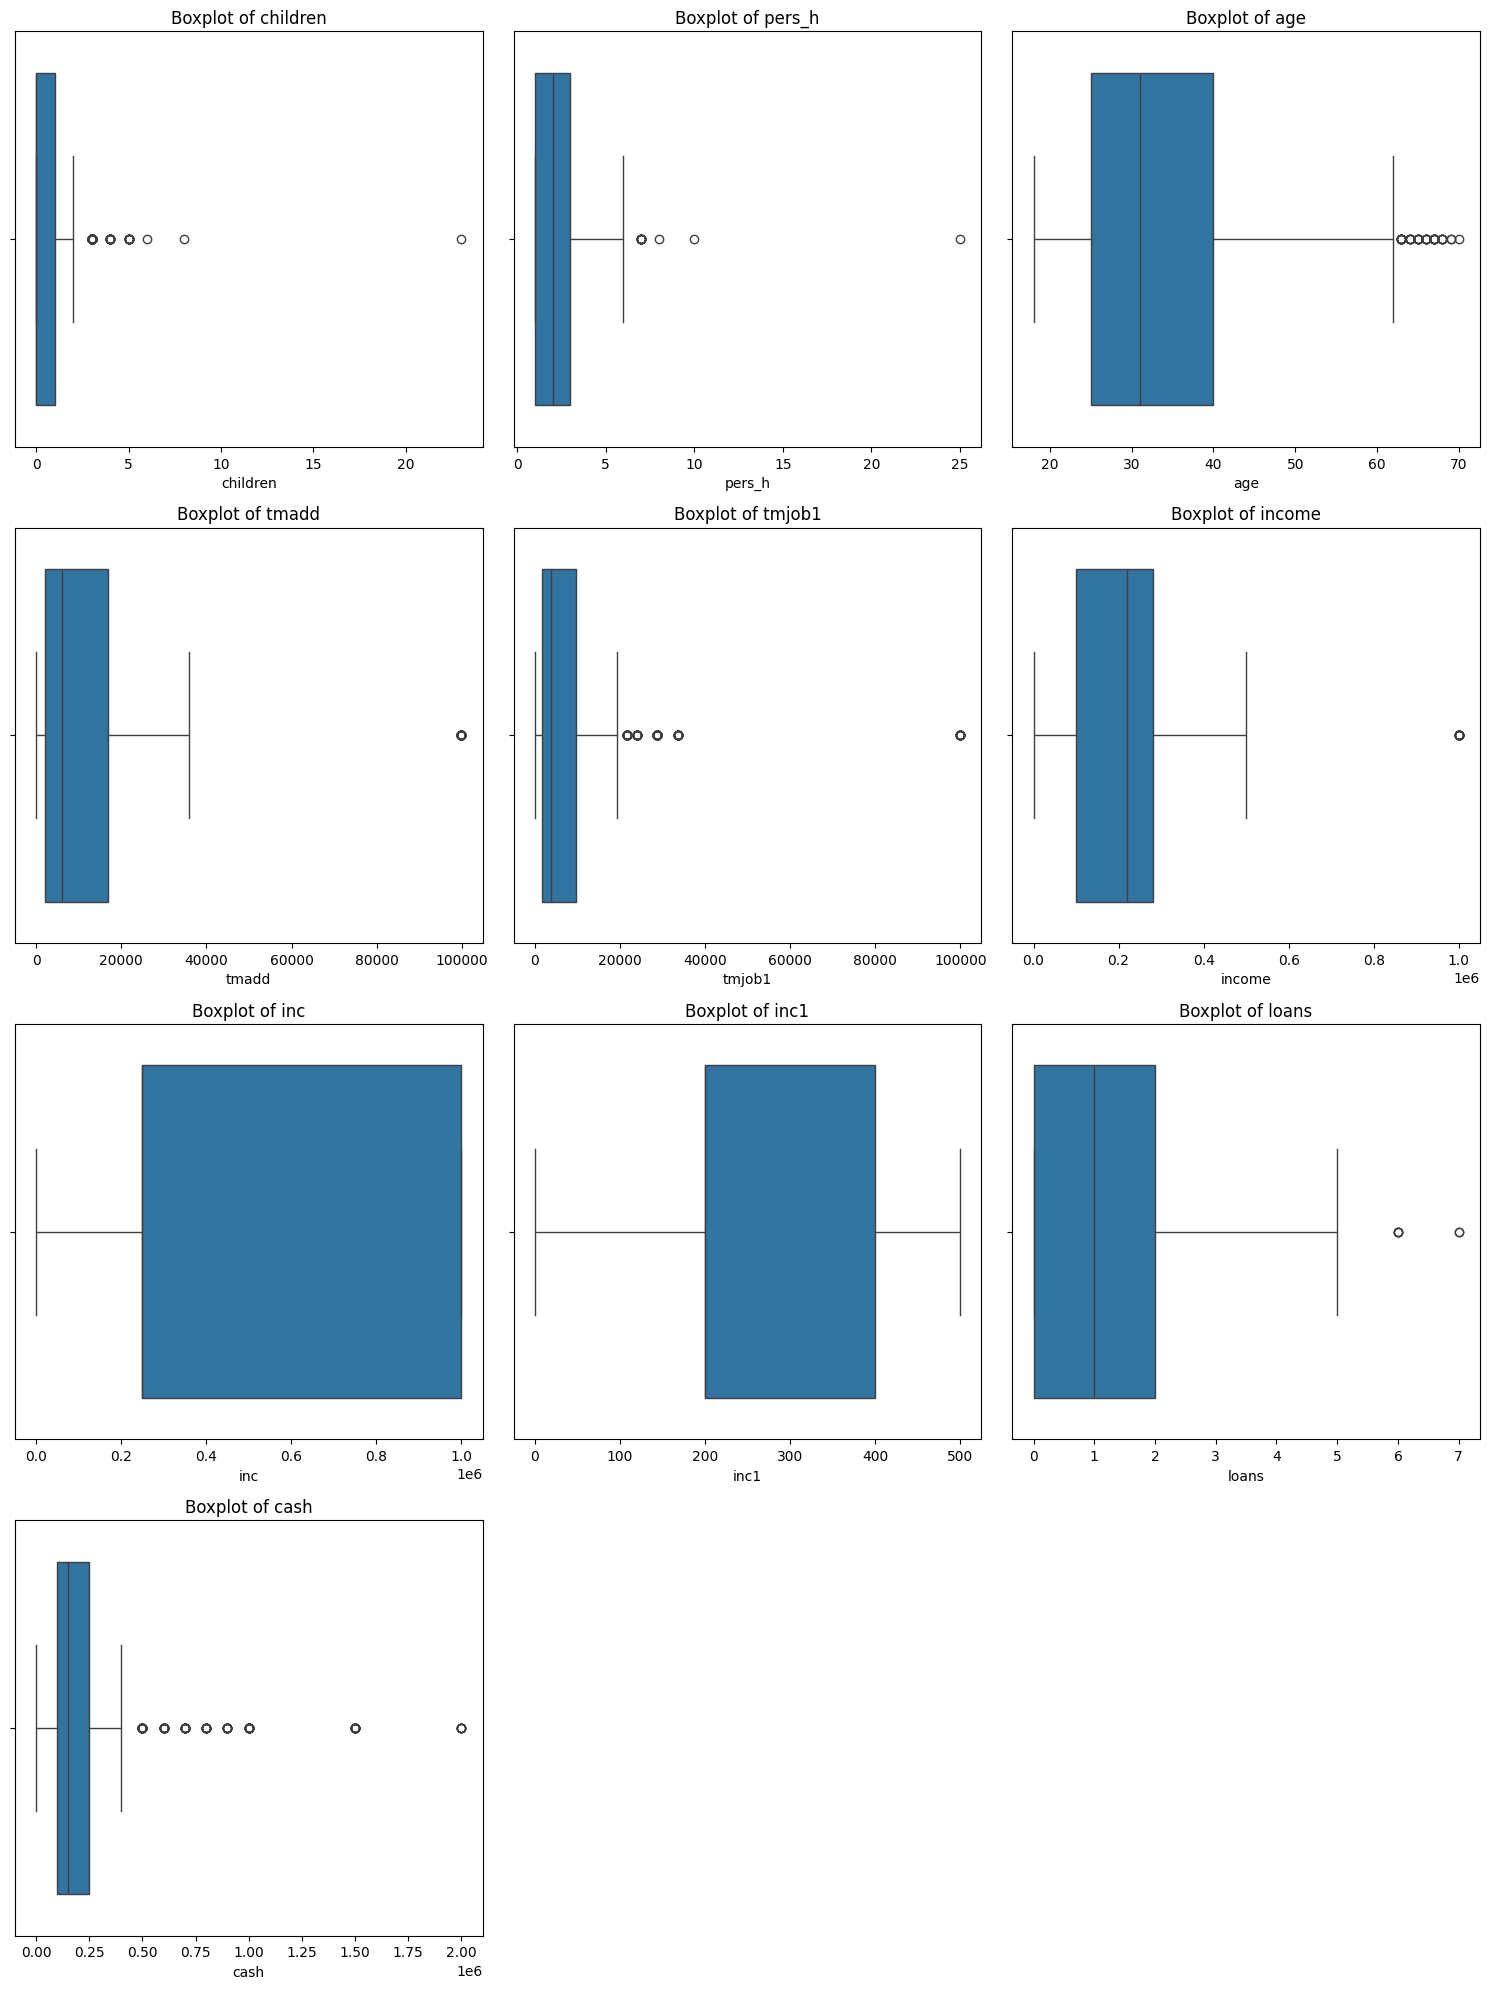

In [64]:
create_boxplots(df, numerical)